## Q5: Cross Validation & Ensemble

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report



In [2]:
iris = load_iris()
X = iris.data                  
y = iris.target                
feature_names = iris.feature_names
class_names = iris.target_names

In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [4]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Train shape:", X_train_scaled.shape)
print("Test shape:", X_test_scaled.shape)

Train shape: (120, 4)
Test shape: (30, 4)


In [5]:
svm_clf = SVC(kernel='rbf', random_state=42)

# 5-fold CV accuracy
cv_scores = cross_val_score(svm_clf, X_train_scaled, y_train, cv=5)

print("SVM Cross-Validation Accuracies:", cv_scores)
print("Average Accuracy:", cv_scores.mean())
print("Std Deviation:", cv_scores.std())

# Train on full training set and test once
svm_clf.fit(X_train_scaled, y_train)
svm_test_acc = svm_clf.score(X_test_scaled, y_test)
print("\nSVM Test Accuracy (single train-test split):", svm_test_acc)

SVM Cross-Validation Accuracies: [0.91666667 1.         0.95833333 0.95833333 1.        ]
Average Accuracy: 0.9666666666666668
Std Deviation: 0.031180478223116186

SVM Test Accuracy (single train-test split): 0.9666666666666667


In [6]:
rf_clf = RandomForestClassifier(n_estimators=200, random_state=42)

# Train on full training data
rf_clf.fit(X_train, y_train)
rf_test_acc = rf_clf.score(X_test, y_test)
print("\nRandom Forest Test Accuracy:", rf_test_acc)

# 5-fold CV
rf_cv_scores = cross_val_score(rf_clf, X_train, y_train, cv=5)
print("Random Forest CV Scores:", rf_cv_scores)
print("Average CV Accuracy:", rf_cv_scores.mean())
print("Std Dev:", rf_cv_scores.std())

# Confusion matrix + classification report
y_pred_rf = rf_clf.predict(X_test)
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf, target_names=class_names))



Random Forest Test Accuracy: 0.9
Random Forest CV Scores: [0.91666667 0.95833333 0.95833333 0.95833333 0.95833333]
Average CV Accuracy: 0.95
Std Dev: 0.016666666666666698

Confusion Matrix:
 [[10  0  0]
 [ 0  9  1]
 [ 0  2  8]]

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.82      0.90      0.86        10
   virginica       0.89      0.80      0.84        10

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



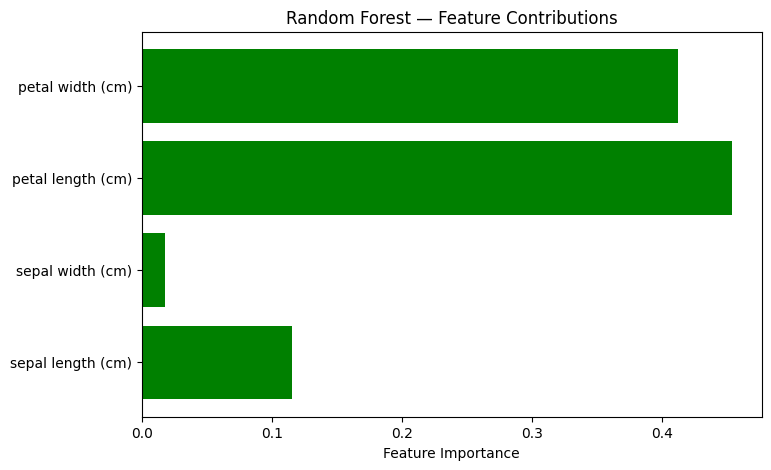

sepal length (cm): 0.1159
sepal width (cm): 0.0179
petal length (cm): 0.4538
petal width (cm): 0.4124


In [7]:
importances = rf_clf.feature_importances_

plt.figure(figsize=(8, 5))
plt.barh(feature_names, importances, color='green')
plt.xlabel("Feature Importance")
plt.title("Random Forest — Feature Contributions")
plt.show()

for f, score in zip(feature_names, importances):
    print(f"{f}: {score:.4f}")